In [79]:
import pandas as pd
from collections import Counter
import re
import statistics

In [80]:
df = pd.read_excel('job_offers.xlsx')
df = pd.DataFrame(df)
df = df.fillna('')

In [81]:
df

,Position,Salary,Status,Skill 1,Skill 2,Skill 3
0,Tableau Developer,Undisclosed Salary,New,Contact with a client,,
1,Senior .NET Engineer,19 073 - 20 980 pln,New,.Net,,
2,Senior Product Manager,19 073 - 20 980 pln,New,Product Management,,
3,Lead React Software Engineer,24 794 - 26 702 pln,New,React,JavaScript,
4,Senior Fullstack Developer (Django/React),21 000 - 27 000 pln,New,,,
...,...,...,...,...,...,...
747,Junior Compliance Analyst,5 000 - 7 000 pln,7d ago,English,Communication Skills,Analytical Thinking
748,Lead Python Developer,24 000 - 29 000 pln,7d ago,Python,DevOps,Python 3.x
749,Lead iOS Software Engineer,26 702 - 27 846 pln,7d ago,SwiftUI,iOS,XCode
750,Java Developer,6 000 - 10 000 pln,11d ago,Java,REST,Spring Boot


In [82]:
df['Skills'] = df['Skill 1'] + ', ' + df['Skill 2'] + ', ' + df['Skill 3']
df = df.drop(columns = ['Skill 1', 'Skill 2', 'Skill 3'])
df

,Position,Salary,Status,Skills
0,Tableau Developer,Undisclosed Salary,New,"Contact with a client, ,"
1,Senior .NET Engineer,19 073 - 20 980 pln,New,".Net, ,"
2,Senior Product Manager,19 073 - 20 980 pln,New,"Product Management, ,"
3,Lead React Software Engineer,24 794 - 26 702 pln,New,"React, JavaScript,"
4,Senior Fullstack Developer (Django/React),21 000 - 27 000 pln,New,", ,"
...,...,...,...,...
747,Junior Compliance Analyst,5 000 - 7 000 pln,7d ago,"English, Communication Skills, Analytical Thin..."
748,Lead Python Developer,24 000 - 29 000 pln,7d ago,"Python, DevOps, Python 3.x"
749,Lead iOS Software Engineer,26 702 - 27 846 pln,7d ago,"SwiftUI, iOS, XCode"
750,Java Developer,6 000 - 10 000 pln,11d ago,"Java, REST, Spring Boot"


In [83]:
# List of seperators to consider
separators = [',', '/', ';']

# Function to separate by different separators
def split_skills(skills, separators):
    pattern = '|'.join(map(re.escape, separators))
    return [skill.strip() for skill in re.split(pattern, skills) if skill.strip()]

# Counting the occurrences of each skill
all_skills = []
for skills in df['Skills']:
    all_skills.extend(split_skills(skills, separators))

In [84]:
skill_counts = Counter(all_skills)

In [85]:
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])

In [86]:
skill_counts_df = skill_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
print(f'Top 20 most demanded skills\n {skill_counts_df.head(20).to_string()}')

Top 20 most demanded skills
          Skill  Count
0          SQL     98
1       Python     86
2      English     85
3         Java     69
4   JavaScript     43
5          AWS     40
6   TypeScript     35
7        React     33
8        Linux     31
9   Kubernetes     30
10          C#     30
11         Git     26
12       Azure     25
13       Agile     22
14        .Net     22
15        JIRA     19
16          CI     19
17          CD     19
18         PHP     19
19      Polish     18


In [87]:
df

,Position,Salary,Status,Skills
0,Tableau Developer,Undisclosed Salary,New,"Contact with a client, ,"
1,Senior .NET Engineer,19 073 - 20 980 pln,New,".Net, ,"
2,Senior Product Manager,19 073 - 20 980 pln,New,"Product Management, ,"
3,Lead React Software Engineer,24 794 - 26 702 pln,New,"React, JavaScript,"
4,Senior Fullstack Developer (Django/React),21 000 - 27 000 pln,New,", ,"
...,...,...,...,...
747,Junior Compliance Analyst,5 000 - 7 000 pln,7d ago,"English, Communication Skills, Analytical Thin..."
748,Lead Python Developer,24 000 - 29 000 pln,7d ago,"Python, DevOps, Python 3.x"
749,Lead iOS Software Engineer,26 702 - 27 846 pln,7d ago,"SwiftUI, iOS, XCode"
750,Java Developer,6 000 - 10 000 pln,11d ago,"Java, REST, Spring Boot"


In [88]:
def create_Salary_list(DataFrame):

  salary_list = []

  for salary in DataFrame['Salary']:
      if salary != 'Undisclosed Salary':
          salary = re.split('-|pln', salary)
          for s in salary:
              if len(s.strip()) <= 3: # ignoring hourly rates because almost all rates in the table are monthly
                  continue
              if s.strip():
                  cleaned_salary = s.strip().replace(' ', '')
                  salary_list.append(int(cleaned_salary))
  return salary_list

In [89]:
def makeSummary(DataFrame, position):
  salary_list = create_Salary_list(DataFrame)

  average_salary = sum(salary_list) / len(salary_list)
  print(f'{position.capitalize()} can count on an average salary of: {round(average_salary, 2)} pln')

  median_salary = statistics.median(salary_list)
  print(f'The median salary is: {round(median_salary, 2)} pln')

  minimum_salary = min(salary_list)
  print(f'The minimum salary is: {round(minimum_salary, 2)} pln')

  maximum_salary = max(salary_list)
  print(f'The maximum salary is: {round(maximum_salary, 2)} pln')

  print(f'Offers: {len(DataFrame)}')
  print(f'Percentage of all offers: {round((len(DataFrame) / len(df)) * 100)}% \n')

makeSummary(df, 'Employee')

Employee can count on an average salary of: 20283.56 pln
The median salary is: 20000.0 pln
The minimum salary is: 4400 pln
The maximum salary is: 65520 pln
Offers: 752
Percentage of all offers: 100% 



In [90]:
df_junior = df.loc[df['Position'].str.contains('junior|młodszy|associate|entry|graduate', case = False)].reset_index(drop=True)
df_senior = df.loc[df['Position'].str.contains('senior|lead|starszy|head|principal|expert', case = False)].reset_index(drop=True)
df_remaining = df.loc[~df['Position'].str.contains('senior|lead|starszy|head|principal|expert|junior|młodszy|associate|entry|graduate', case = False)].reset_index(drop=True)

In [91]:
df_junior

,Position,Salary,Status,Skills
0,Junior / Mid Tester automatyzujący / Testerka ...,6 000 - 10 000 pln,New,", ,"
1,Junior Backend Developer (Python),6 000 - 10 000 pln,New,"Polish, ,"
2,Junior Front-End Developer,Undisclosed Salary,New,"JavaScript ES, ,"
3,Junior Product Manager,Undisclosed Salary,New,"Agile, Product Management,"
4,Junior DevOps Engineer,9 000 - 13 000 pln,New,"Polish, English, Terraform"
5,Junior/ Mid DevOps Engineer,9 000 - 16 500 pln,New,"GitLab, Ubuntu, Cassandra"
6,Junior Product Support Specialist (Fintech),5 500 - 8 500 pln,New,"Customer Support, IT Support, FinTech"
7,Młodszy Specjalista ds. Obsługi Klienta,4 400 pln,New,"Komunikatywność, JIRA, hosting"
8,Junior .Net Developer,10 000 - 13 000 pln,New,"C#, .NET Core, Angular 2+"
9,Junior Software Tester,5 000 - 6 000 pln,New,"Testing, SQL, TestRail"


In [92]:
df_senior

,Position,Salary,Status,Skills
0,Senior .NET Engineer,19 073 - 20 980 pln,New,".Net, ,"
1,Senior Product Manager,19 073 - 20 980 pln,New,"Product Management, ,"
2,Lead React Software Engineer,24 794 - 26 702 pln,New,"React, JavaScript,"
3,Senior Fullstack Developer (Django/React),21 000 - 27 000 pln,New,", ,"
4,Senior QA Analyst,12 000 - 20 000 pln,New,"TestRail, Figma,"
...,...,...,...,...
274,Senior Fullstack Developer (Java + Angular),14 900 - 20 590 pln,5d ago,"Git, Spring, Java"
275,Senior Fullstack Developer (Java + Angular),14 900 - 20 590 pln,5d ago,"Git, Spring, Java"
276,Senior Data Engineer,22 506 - 23 650 pln,7d ago,"Python, BigQuery, GCP"
277,Lead Python Developer,24 000 - 29 000 pln,7d ago,"Python, DevOps, Python 3.x"


In [93]:
df_remaining

,Position,Salary,Status,Skills
0,Tableau Developer,Undisclosed Salary,New,"Contact with a client, ,"
1,Test Automation Engineer z j.niemieckim,18 500 - 28 600 pln,New,"Niemiecki, ,"
2,Data Scientist - Location Intelligence,Undisclosed Salary,New,"English, ML, Data Scientist"
3,Fullstack Developer,26 880 pln,New,"Node.js, TypeScript,"
4,Jira Service Manager Engineer,Undisclosed Salary,New,"JIRA, Atlassian, AI"
...,...,...,...,...
446,Data Engineer,21 800 - 30 240 pln,6d ago,"DWH, Data Lake, Python"
447,IT Project Manager/ka,10 000 - 13 000 pln,6d ago,"Confluence, JIRA, Analiza Biznesowa"
448,Business Intelligence (Power BI) Developer,11 500 - 25 000 pln,7d ago,"DAX, MQ, SQL"
449,Java Developer,6 000 - 10 000 pln,11d ago,"Java, REST, Spring Boot"


## **Summary**

In [94]:
makeSummary(df, 'Employee')
makeSummary(df_junior, 'Junior')
makeSummary(df_senior, 'Senior')
makeSummary(df_remaining, 'employees not identified as senior or junior')
print(f'Top 20 most demanded skills\n {skill_counts_df.head(20).to_string()}')

Employee can count on an average salary of: 20283.56 pln
The median salary is: 20000.0 pln
The minimum salary is: 4400 pln
The maximum salary is: 65520 pln
Offers: 752
Percentage of all offers: 100% 

Junior can count on an average salary of: 8938.24 pln
The median salary is: 8250.0 pln
The minimum salary is: 4400 pln
The maximum salary is: 16500 pln
Offers: 22
Percentage of all offers: 3% 

Senior can count on an average salary of: 24075.17 pln
The median salary is: 23000 pln
The minimum salary is: 9700 pln
The maximum salary is: 65520 pln
Offers: 279
Percentage of all offers: 37% 

Employees not identified as senior or junior can count on an average salary of: 18095.01 pln
The median salary is: 17101 pln
The minimum salary is: 4800 pln
The maximum salary is: 47000 pln
Offers: 451
Percentage of all offers: 60% 

Top 20 most demanded skills
          Skill  Count
0          SQL     98
1       Python     86
2      English     85
3         Java     69
4   JavaScript     43
5          AWS

<Axes: title={'center': 'Top 20 most demanded skills'}, xlabel='Skill', ylabel='Count'>

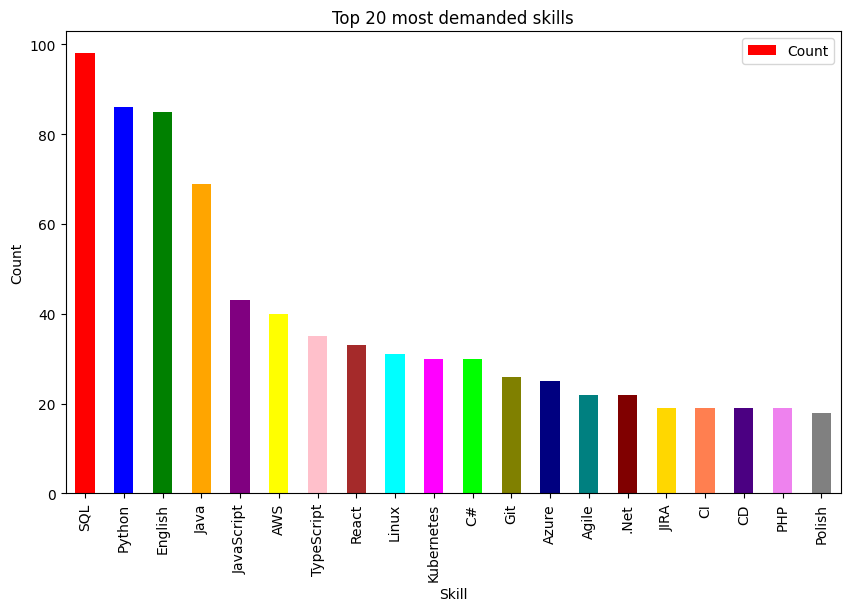

In [95]:
colors = [
    'red', 'blue', 'green', 'orange', 'purple',
    'yellow', 'pink', 'brown', 'cyan', 'magenta',
    'lime', 'olive', 'navy', 'teal', 'maroon',
    'gold', 'coral', 'indigo', 'violet', 'grey'
]

skill_counts_df.head(20).plot(kind='bar', title = "Top 20 most demanded skills", xlabel='Skill', ylabel='Count', x='Skill', y='Count', figsize=(10, 6), color=colors)